In [7]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn

In [8]:
from problem import Domain, Poisson_2d
from my_utils import  plot_domain_2d, plot_2d_tri

[[-1  1]
 [-1  1]]


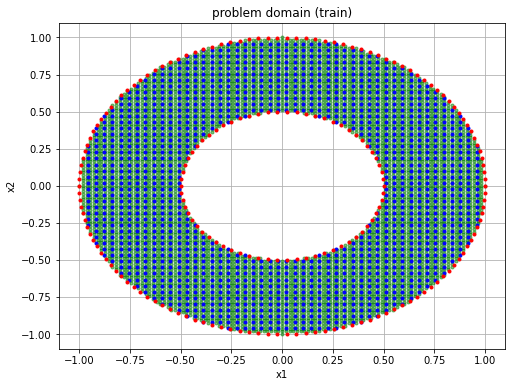

In [9]:
domain = Domain(domain_range=(-1,1,-1,1),domain_shape='annulus')
print(domain.domain_range)
x_pde = domain.sample_domain_uniform(mesh_size=[50,50])
x_test = domain.sample_domain_uniform(mesh_size=[111,111])
x_bd = domain.sample_boundary_uniform(sample_size=200)

plot_domain_2d(x_pde=x_pde,x_bd=x_bd,x_test=x_test)

pde rmse: 4.0036141429173556e-15


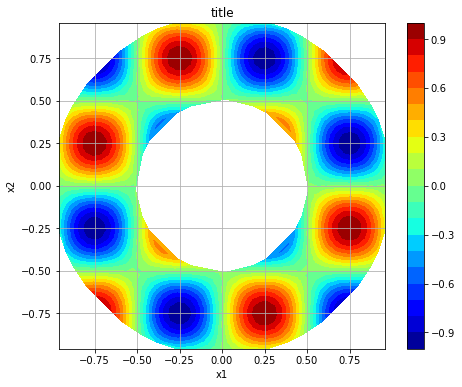

***************************************************
Poisson (case=1):
	x_pde:   	(1408, 2)
	x_bd:    	(200, 2)
	x_ic:    	None
	x_test:    	(7100, 2)
***************************************************


In [10]:
my_prob = Poisson_2d(case=1)
x,u = my_prob.check_solution(x_pde)
plot_2d_tri(x[:,0], x[:,1], u[:,0],shape='annulus')
target_pde = my_prob.rhs(x_pde)
target_bd = my_prob.u_exact(x_bd)
target_test = my_prob.u_exact(x_test)

my_prob.set_data(x_pde=x_pde, x_test=x_test, x_bd=x_bd,
                 target_pde=target_pde, target_test=target_test, target_bd=target_bd)
print(my_prob)

In [11]:
np.savez('data/data', x_pde=x_pde, x_bd=x_bd, x_test=x_test,
         target_pde=target_pde, target_bd=target_bd, target_test=target_test)